<a href="https://colab.research.google.com/github/Rashi0903/Lung-Cancer-Detection/blob/main/lungCancer(GAN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2/2 [==============================] - 0s 7ms/step
1/37, D Loss: 0.18550901859998703, D Acc: 100.0, G Loss: 1.737473964691162
2/2 [==============================] - 0s 7ms/step
2/37, D Loss: 0.08287260308861732, D Acc: 100.0, G Loss: 2.759887218475342
2/2 [==============================] - 0s 6ms/step
3/37, D Loss: 0.04306094907224178, D Acc: 100.0, G Loss: 3.5178070068359375
2/2 [==============================] - 0s 8ms/step
4/37, D Loss: 0.036893900483846664, D Acc: 100.0, G Loss: 3.9954757690429688
2/2 [==============================] - 0s 6ms/step
5/37, D Loss: 0.026767504401504993, D Acc: 100.0, G Loss: 4.068636417388916
2/2 [==============================] - 0s 7ms/step
6/37, D Loss: 0.026092607527971268, D Acc: 100.0, G Loss: 4.199373722076416
2/2 [==============================] - 0s 7ms/step
7/37, D Loss: 0.017457344569265842, D Acc: 100.0, G Loss: 4.581868648529053
2/2 [==============================] - 0s 7ms/step
8/37, D Loss: 0.021911238320171833, D Acc: 100.0, G Loss: 4.7

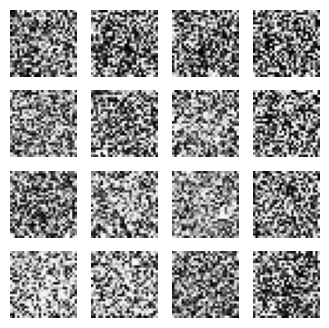

2/2 [==============================] - 0s 11ms/step
11/37, D Loss: 0.039107026532292366, D Acc: 100.0, G Loss: 5.6793437004089355
2/2 [==============================] - 0s 8ms/step
12/37, D Loss: 0.03129844227805734, D Acc: 100.0, G Loss: 5.733280658721924
2/2 [==============================] - 0s 7ms/step
13/37, D Loss: 0.06044784374535084, D Acc: 98.14814925193787, G Loss: 5.696404457092285
2/2 [==============================] - 0s 14ms/step
14/37, D Loss: 0.09525356069207191, D Acc: 94.44444179534912, G Loss: 5.820135116577148
2/2 [==============================] - 0s 7ms/step
15/37, D Loss: 0.13212942145764828, D Acc: 95.37037014961243, G Loss: 5.53106689453125
2/2 [==============================] - 0s 7ms/step
16/37, D Loss: 0.16393788158893585, D Acc: 93.51851642131805, G Loss: 5.350094318389893
2/2 [==============================] - 0s 9ms/step
17/37, D Loss: 0.13091085106134415, D Acc: 95.37037014961243, G Loss: 5.725313663482666
2/2 [==============================] - 0s 8ms/st

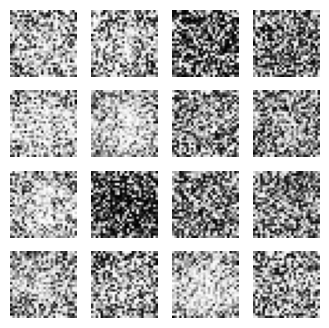

2/2 [==============================] - 0s 9ms/step
21/37, D Loss: 0.1940317526459694, D Acc: 91.66666865348816, G Loss: 4.573758602142334
2/2 [==============================] - 0s 13ms/step
22/37, D Loss: 0.3914850056171417, D Acc: 83.33333432674408, G Loss: 4.50504732131958
2/2 [==============================] - 0s 7ms/step
23/37, D Loss: 0.37240320444107056, D Acc: 84.25925970077515, G Loss: 4.270117282867432
2/2 [==============================] - 0s 8ms/step
24/37, D Loss: 0.4159393161535263, D Acc: 83.33333432674408, G Loss: 4.601433753967285
2/2 [==============================] - 0s 8ms/step
25/37, D Loss: 0.242887444794178, D Acc: 90.74074029922485, G Loss: 4.913503170013428
2/2 [==============================] - 0s 10ms/step
26/37, D Loss: 0.25058987736701965, D Acc: 89.81481492519379, G Loss: 3.594836950302124
2/2 [==============================] - 0s 7ms/step
27/37, D Loss: 0.27191169559955597, D Acc: 89.81481492519379, G Loss: 4.151540756225586
2/2 [==========================

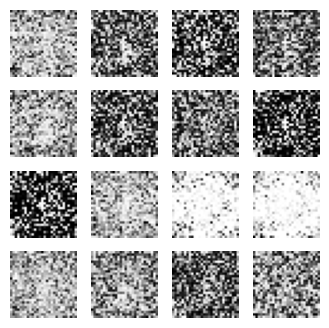

2/2 [==============================] - 0s 9ms/step
31/37, D Loss: 0.3537316620349884, D Acc: 85.18518507480621, G Loss: 5.288982391357422
2/2 [==============================] - 0s 8ms/step
32/37, D Loss: 0.18768088892102242, D Acc: 93.5185194015503, G Loss: 4.028627872467041
2/2 [==============================] - 0s 8ms/step
33/37, D Loss: 0.20417843759059906, D Acc: 92.59259104728699, G Loss: 4.494105815887451
2/2 [==============================] - 0s 9ms/step
34/37, D Loss: 0.18180663883686066, D Acc: 92.59259402751923, G Loss: 5.788702964782715
2/2 [==============================] - 0s 8ms/step
35/37, D Loss: 0.15556804090738297, D Acc: 91.66666865348816, G Loss: 6.461275577545166
2/2 [==============================] - 0s 9ms/step
36/37, D Loss: 0.19447386264801025, D Acc: 92.59259402751923, G Loss: 4.038942813873291
2/2 [==============================] - 0s 9ms/step
37/37, D Loss: 0.09109023213386536, D Acc: 96.29629850387573, G Loss: 5.010612964630127
66/66 [======================

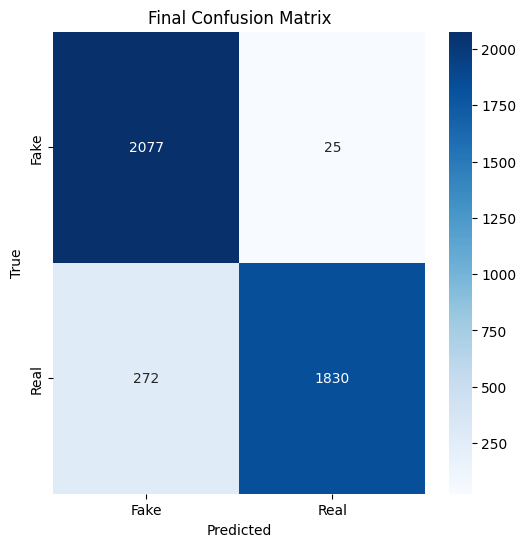

In [ ]:
#GAN

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


def load_images_from_folder(folder, target_size=(28, 28)):
    images = []
    for subdir in os.listdir(folder):
        subdir_path = os.path.join(folder, subdir)
        if os.path.isdir(subdir_path):
            for filename in os.listdir(subdir_path):
                img_path = os.path.join(subdir_path, filename)
                if os.path.isdir(img_path):
                    continue
                img = load_img(img_path, target_size=target_size, color_mode='grayscale')
                img_array = img_to_array(img)
                images.append(img_array)
    return np.array(images)

# Path to your dataset in Google Drive
train_dir = '/content/drive/My Drive/cancer/train'
test_dir = '/content/drive/My Drive/cancer/test'

# Load train and test images
train_images = load_images_from_folder(train_dir)
test_images = load_images_from_folder(test_dir)

# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Expand dimensions to match the expected input shape
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

BUFFER_SIZE = len(train_images)
BATCH_SIZE = 256

# Create batches of images
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices(test_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Image Data Augmentation
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2)

# Generator model
def build_generator():
    model = Sequential()
    model.add(Dense(256, input_shape=(100,)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(28 * 28 * 1, activation='tanh'))
    model.add(Reshape((28, 28, 1)))
    return model

# Discriminator model
def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Build and compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Build the generator
generator = build_generator()

# Create the GAN by stacking the generator and the discriminator
gan = Sequential()
gan.add(generator)
discriminator.trainable = False
gan.add(discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Function to train the GAN
def train_gan(gan, dataset, batch_size, epochs):
    generator, discriminator = gan.layers

    for epoch in range(epochs):
        for real_images in dataset:
            # Apply data augmentation
            real_images = np.squeeze(real_images.numpy(), axis=-1)  # Remove the extra dimension
            augmented_images = next(datagen.flow(real_images, batch_size=batch_size, shuffle=False))

            batch_size = augmented_images.shape[0]
            noise = np.random.normal(0, 1, (batch_size, 100))
            fake_images = generator.predict(noise)

            real_labels = np.ones((batch_size, 1))
            fake_labels = np.zeros((batch_size, 1))

            d_loss_real = discriminator.train_on_batch(np.expand_dims(augmented_images, axis=-1), real_labels)
            d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            noise = np.random.normal(0, 1, (batch_size, 100))
            valid_y = np.ones((batch_size, 1))

            g_loss = gan.train_on_batch(noise, valid_y)

        print(f"{epoch+1}/{epochs}, D Loss: {d_loss[0]}, D Acc: {100*d_loss[1]}, G Loss: {g_loss}")

        if (epoch + 1) % 10 == 0:
            sample_images(generator, epoch + 1)

    # Evaluate discriminator performance after all epochs
    y_pred_real = discriminator.predict(train_images)
    y_pred_real = (y_pred_real > 0.5).astype(int)
    y_true_real = np.ones((train_images.shape[0], 1))

    y_pred_fake = discriminator.predict(generator.predict(np.random.normal(0, 1, (train_images.shape[0], 100))))
    y_pred_fake = (y_pred_fake > 0.5).astype(int)
    y_true_fake = np.zeros((train_images.shape[0], 1))

    y_pred = np.vstack((y_pred_real, y_pred_fake))
    y_true = np.vstack((y_true_real, y_true_fake))

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print(f"Final Results - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print("Final Confusion Matrix:")
    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Final Confusion Matrix')
    plt.show()

# Function to save and plot generated images
def sample_images(generator, epoch, image_grid_rows=4, image_grid_columns=4):
    noise = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, 100))
    gen_images = generator.predict(noise)
    gen_images = 0.5 * gen_images + 0.5

    fig, axs = plt.subplots(image_grid_rows, image_grid_columns, figsize=(4, 4))
    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i, j].imshow(gen_images[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.show()

# Train the GAN
train_gan(gan, train_dataset, batch_size=BATCH_SIZE, epochs=37)